<a href="https://colab.research.google.com/github/KIQVinicius/Data-Science/blob/master/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cachorro ou porco?

In [1]:
from sklearn.svm import LinearSVC
import numpy as np

In [2]:
#Feature (1 sim, 0 Não)
#pelo longo?
#perna curta?
#late?
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

In [3]:
#Cachorro = 0
#Porco = 1

treino_x =[porco1, porco2,porco3,cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0]

In [4]:
model = LinearSVC()

In [5]:
model.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
animal_misterioso = [1,1,1]

In [7]:
model.predict([animal_misterioso])

array([0])

In [8]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

In [9]:
teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]

In [10]:
previsoes = model.predict(teste_x)

In [11]:
previsoes == teste_y

array([ True,  True, False])

In [12]:
corretos = (previsoes == teste_y).sum()
#Número de verdadeiros
total = len(teste_y)

In [13]:
taxa_de_acerto = corretos/total

In [14]:
print("Taxa de acerto: " + str(taxa_de_acerto*100))

Taxa de acerto: 66.66666666666666


In [15]:
from sklearn.metrics import accuracy_score 

In [16]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto: " + str(taxa_de_acerto*100))


Taxa de acerto: 66.66666666666666



# Comprou ou não?

In [17]:
import pandas as pd

In [18]:
url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"

In [19]:
dados = pd.read_csv(url)

In [20]:
x = dados[['home','how_it_works', 'contact']]
y = dados['bought']

In [21]:
dados.shape

(99, 4)

In [22]:
treino_x = x[:75]
treino_y = y[:75]

In [23]:
teste_x = x[75:]
teste_y = y[75:]

In [24]:
modelo = LinearSVC()
modelo.fit(treino_x,treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
predicao =  modelo.predict(teste_x)

In [26]:
accuracy_score(teste_y,predicao )

0.9583333333333334

# Projetos Web


In [27]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [28]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [29]:
dados.columns = ['finished', 'expected_hours', 'price']

In [30]:
troca = {
    0:1,
    1:0
}

In [31]:
dados['finished'] = dados['finished'].map(troca)

In [32]:
dados.head()

,finished,expected_hours,price
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


In [33]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


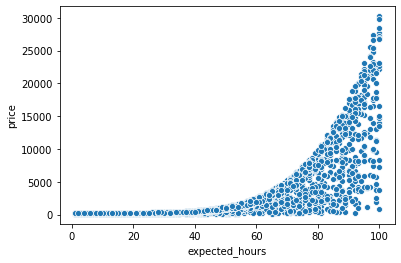

In [34]:
sns.scatterplot(x='expected_hours', y = 'price', data = dados)

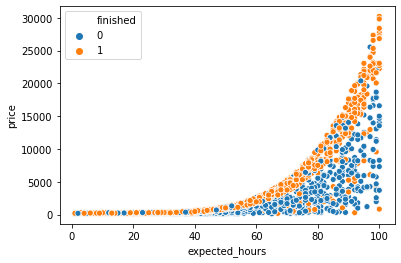

In [35]:
sns.scatterplot(x='expected_hours', y = 'price', hue = 'finished',data = dados)

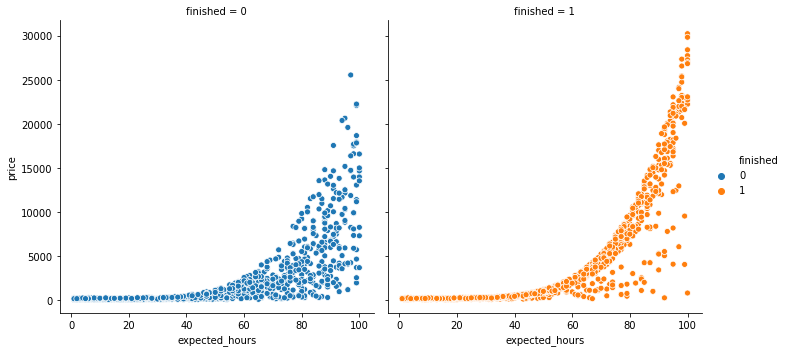

In [36]:
sns.relplot(x='expected_hours', y = 'price', col = 'finished', hue = 'finished',data = dados)

In [37]:
x = dados[['expected_hours', 'price']]
y = dados['finished']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

np.random.seed(20)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 48.89%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


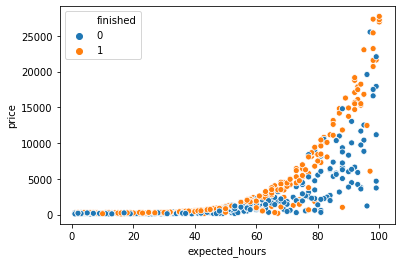

In [39]:
sns.scatterplot(x="expected_hours", y = "price", hue = teste_y, data=teste_x)

In [40]:
import numpy as np
x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()

In [41]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [42]:
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [43]:
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [44]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)

In [45]:
import matplotlib.pyplot as plt

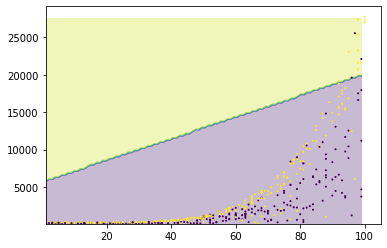

In [46]:
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x['expected_hours'], teste_x['price'],c=teste_y, s = 1 )

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(10)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 56.67%


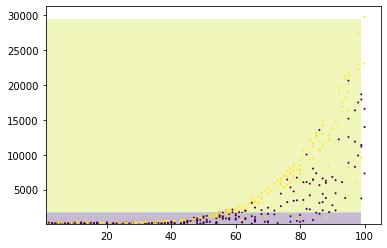

In [48]:
x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(teste_x['expected_hours'], teste_x['price'],c=teste_y, s = 1 )

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(10)
raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
#Padronizando a escala
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 67.41%


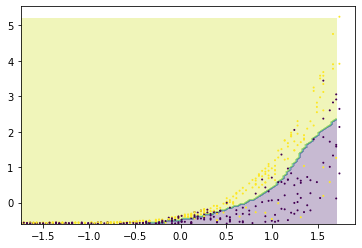

In [51]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)
xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y,c=teste_y, s = 1 )

# Venda de Carros

In [52]:
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")

In [53]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [54]:
a_renomear = {
    'mileage_per_year' : "milhas_por_ano",
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold': 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [55]:
a_trocar = {
    'yes':1,
    'no':0
}

In [56]:
dados['vendido'] = dados['vendido'].map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [57]:
from datetime import datetime
ano = datetime.today().year
dados['idade_do_modelo'] = ano - dados['ano_do_modelo']

In [58]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [59]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [60]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [62]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

np.random.seed(20)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo_dummy = DummyClassifier()
modelo_dummy.fit(treino_x, treino_y)
previsoes = modelo_dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 53.12%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(5)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes_SVC = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

np.random.seed(5)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes_SVC = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


In [111]:
dot_data = export_graphviz(modelo, out_file=None,  feature_names = x.columns, filled=True, rounded=True, class_names=['Não', 'Sim'])

In [112]:
grafico = graphviz.Source(dot_data)

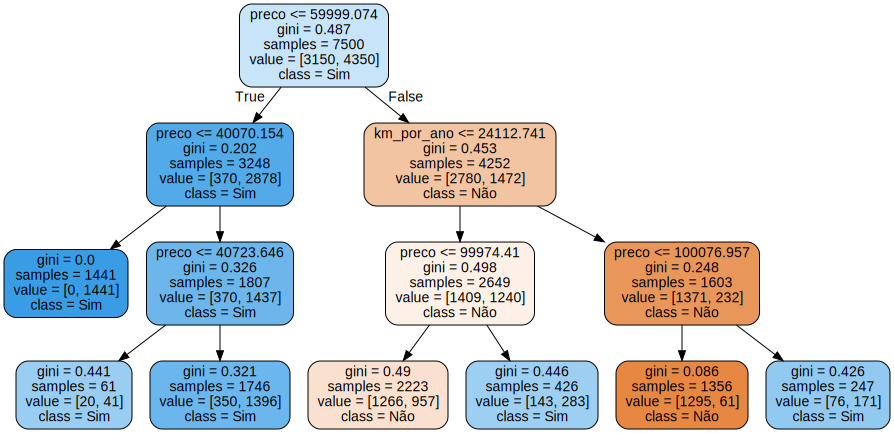

In [113]:
grafico